# Training Material: Loading and Visualizing ALOS-2 Data with Python

## Working with ALOS-2 Data in Python

### I. Required Libraries:

* Installation of necessary libraries (rasterio, matplotlib, numpy, geopandas, scikit-image, scipy)

In [1]:
!pip install rasterio matplotlib numpy geopandas scikit-image scipy

### II. Reading and Visualizing ALOS-2 Data

* Understanding GeoTIFF format 
* Loading ALOS-2 data using rasterio
* Basic visualization with matplotlib
* Applying colormaps for enhanced visualization (Optional)
* Generating histograms of pixel values

* **Single image**

**A. Loading ALOS-2 Data:**

In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Replace with your actual file path
alos_file = '/home/jovyan/shared/Arissara/genAI/processed_images/processed_IMG-HH-ALOS2294160720-191103-UBSR2.1GUA.tif'

with rasterio.open(alos_file) as src:
    alos_data = src.read(1)

**B. Visualizing ALOS-2 Data**

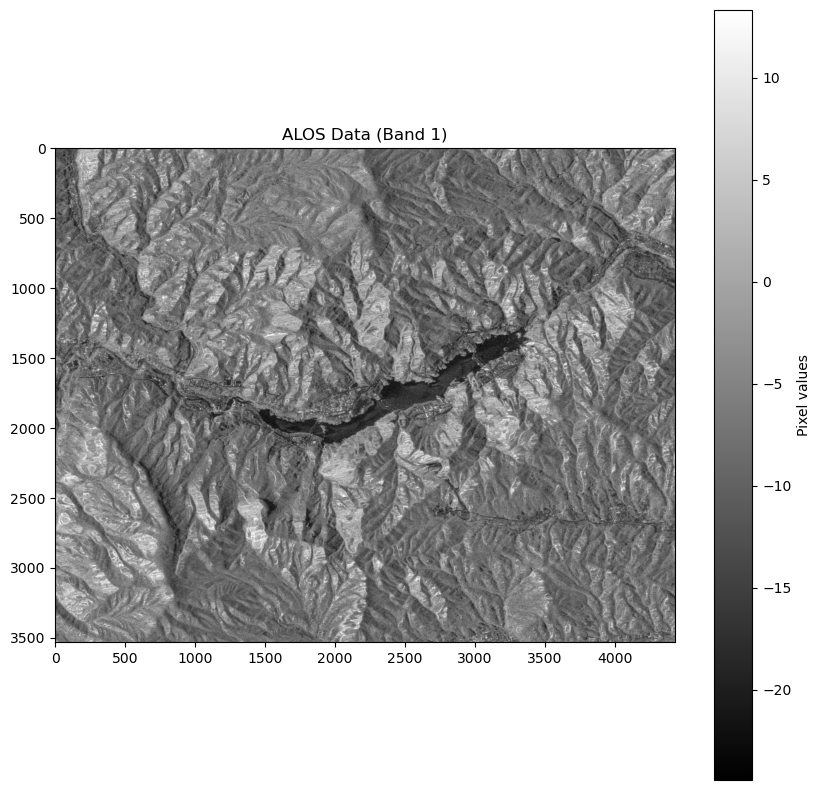

In [3]:
# Visualization
plt.figure(figsize=(10, 10))
plt.imshow(alos_data, cmap='gray')
plt.title('ALOS Data (Band 1)')
plt.colorbar(label='Pixel values')
plt.show()

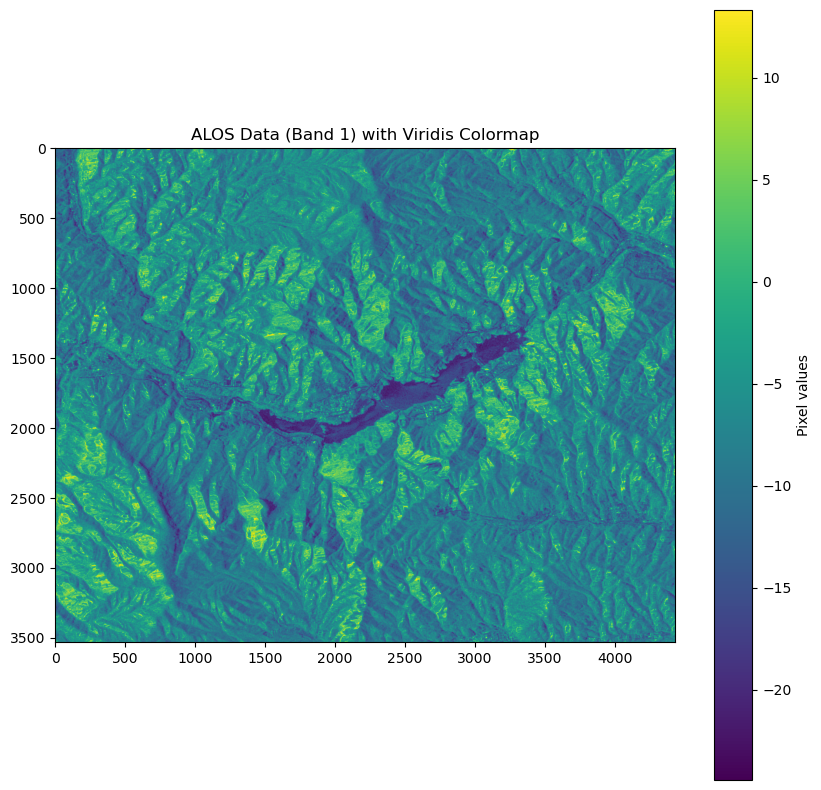

In [4]:
# Apply colormaps for enhanced visualization
plt.figure(figsize=(10, 10))
plt.imshow(alos_data, cmap='viridis')
plt.title('ALOS Data (Band 1) with Viridis Colormap')
plt.colorbar(label='Pixel values')
plt.show()

**C. Compute histogram**

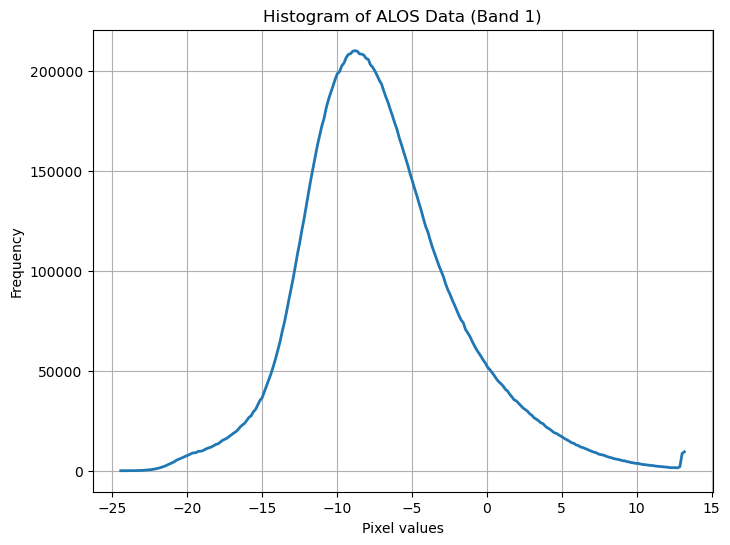

In [5]:
# Plot histogram
hist_values, bin_edges = np.histogram(alos_data, bins=256)
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[:-1], hist_values, lw=2)
plt.title('Histogram of ALOS Data (Band 1)')
plt.xlabel('Pixel values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* **Multiple images**

**A. Loading ALOS-2 Data:**

In [9]:
import os
import matplotlib.pyplot as plt
import rasterio

# Folder containing the GeoTIFF images
folder_path = "/home/jovyan/shared/Arissara/genAI/processed_images"
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')]

**B. Visualizing ALOS-2 Data**

/tmp/ipykernel_789/2638519654.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust layout to avoid overlapping with colorbar


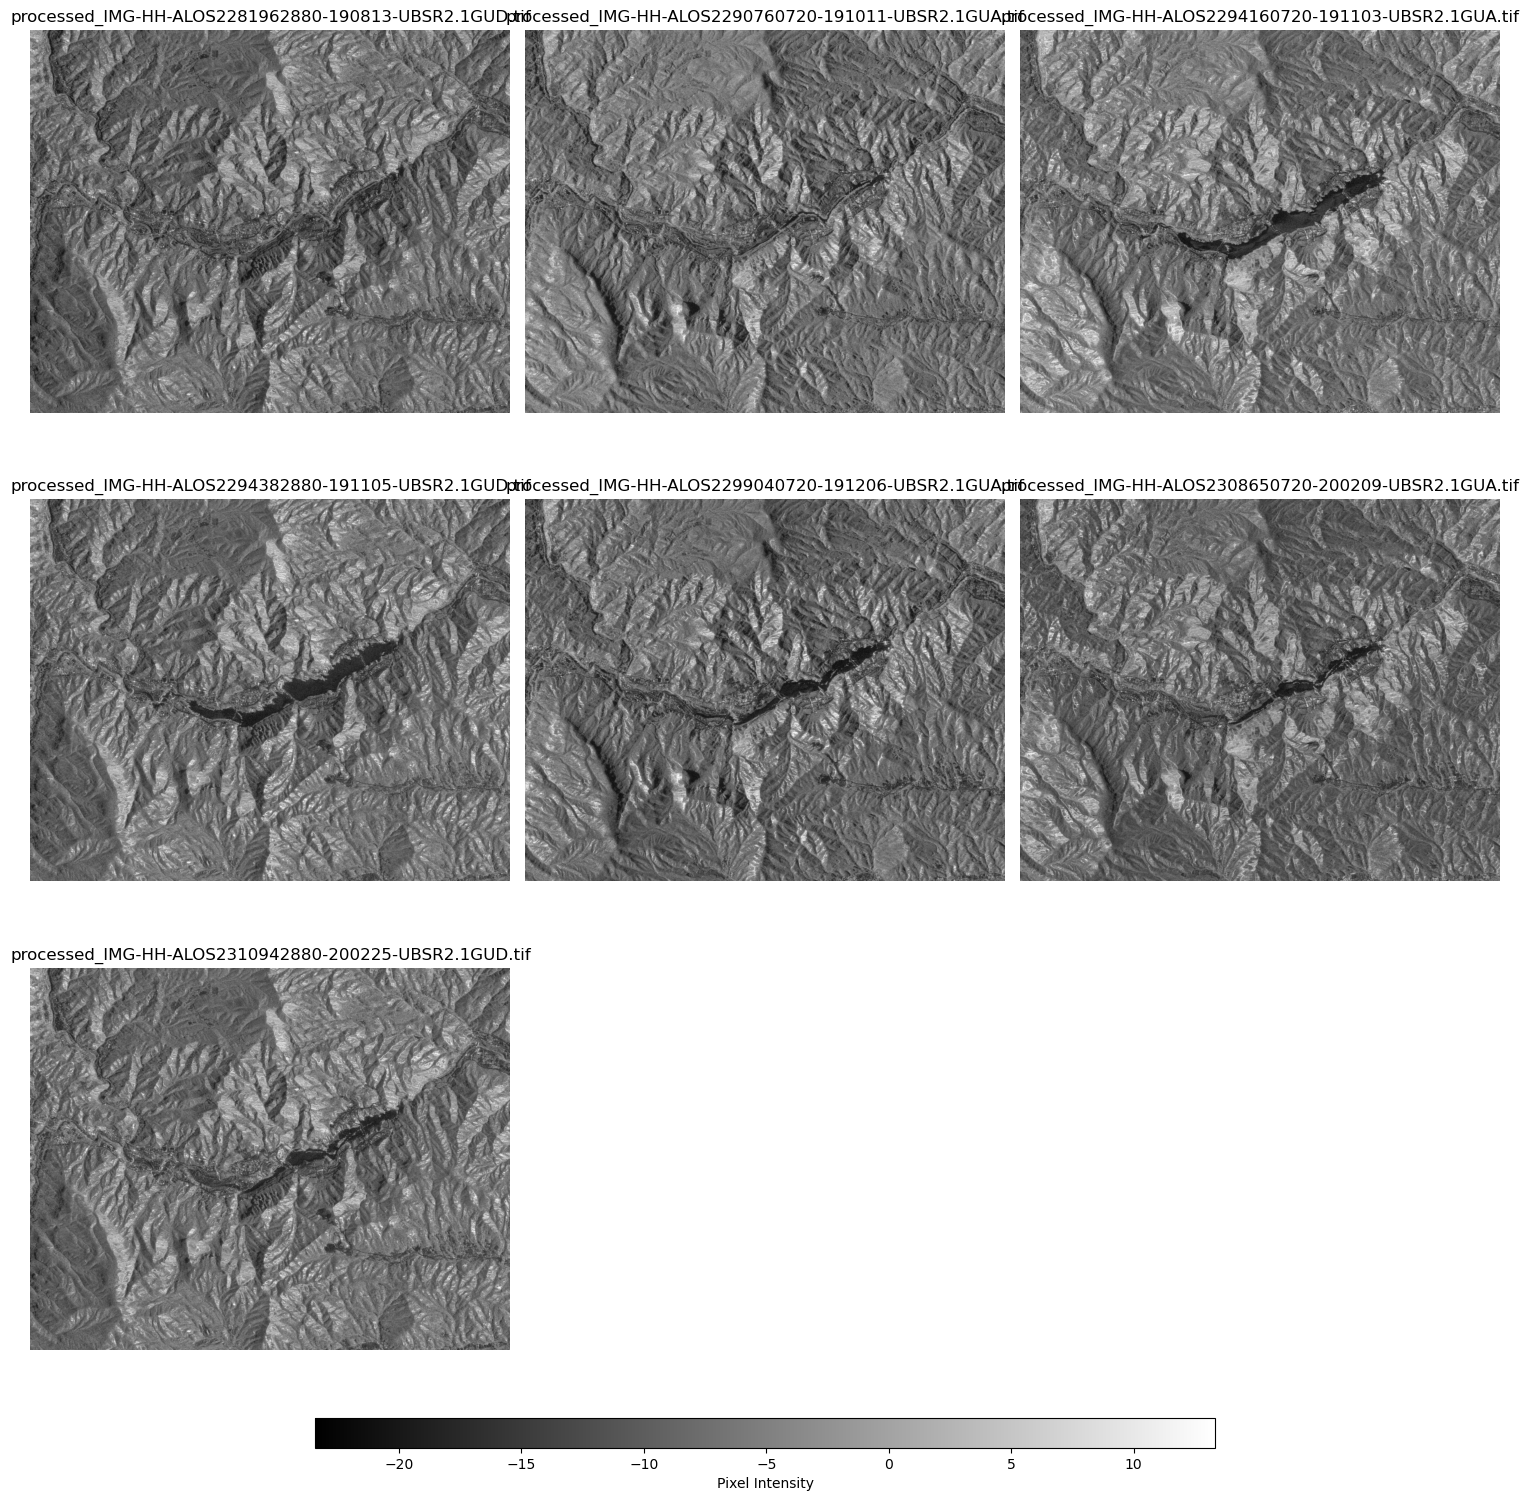

In [10]:
# Sort or filter images if needed
image_files = sorted(image_files)[:7]  # Take only the first 7 images if more are present

# Define titles (option 1: use filenames as titles)
figure_titles = [os.path.basename(f) for f in image_files]

# Option 2: Use generic titles
# figure_titles = [f"Image {i+1}" for i in range(len(image_files))]

# Number of columns
n_cols = 3
n_images = len(image_files)
n_rows = (n_images + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through images and display
for idx, image_path in enumerate(image_files):
    with rasterio.open(image_path) as src:
        image_data = src.read(1)  # Read the first band; adjust if multi-band image

        # Plot image
        im = axes[idx].imshow(image_data, cmap='gray')
        axes[idx].set_title(figure_titles[idx])  # Use titles from the figure_titles list
        axes[idx].axis("off")

# Hide any extra subplots if there are fewer images than total axes
for ax in axes[n_images:]:
    ax.axis("off")

# Add a color bar below all images without overlapping
cbar_ax = fig.add_axes([0.2, 0.01, 0.6, 0.02])  # Centered below all images
fig.colorbar(im, cax=cbar_ax, orientation='horizontal').set_label('Pixel Intensity')

plt.tight_layout(rect=[0, 0.03, 1, 1])  # Adjust layout to avoid overlapping with colorbar
plt.show()

**C. Compute histogram**

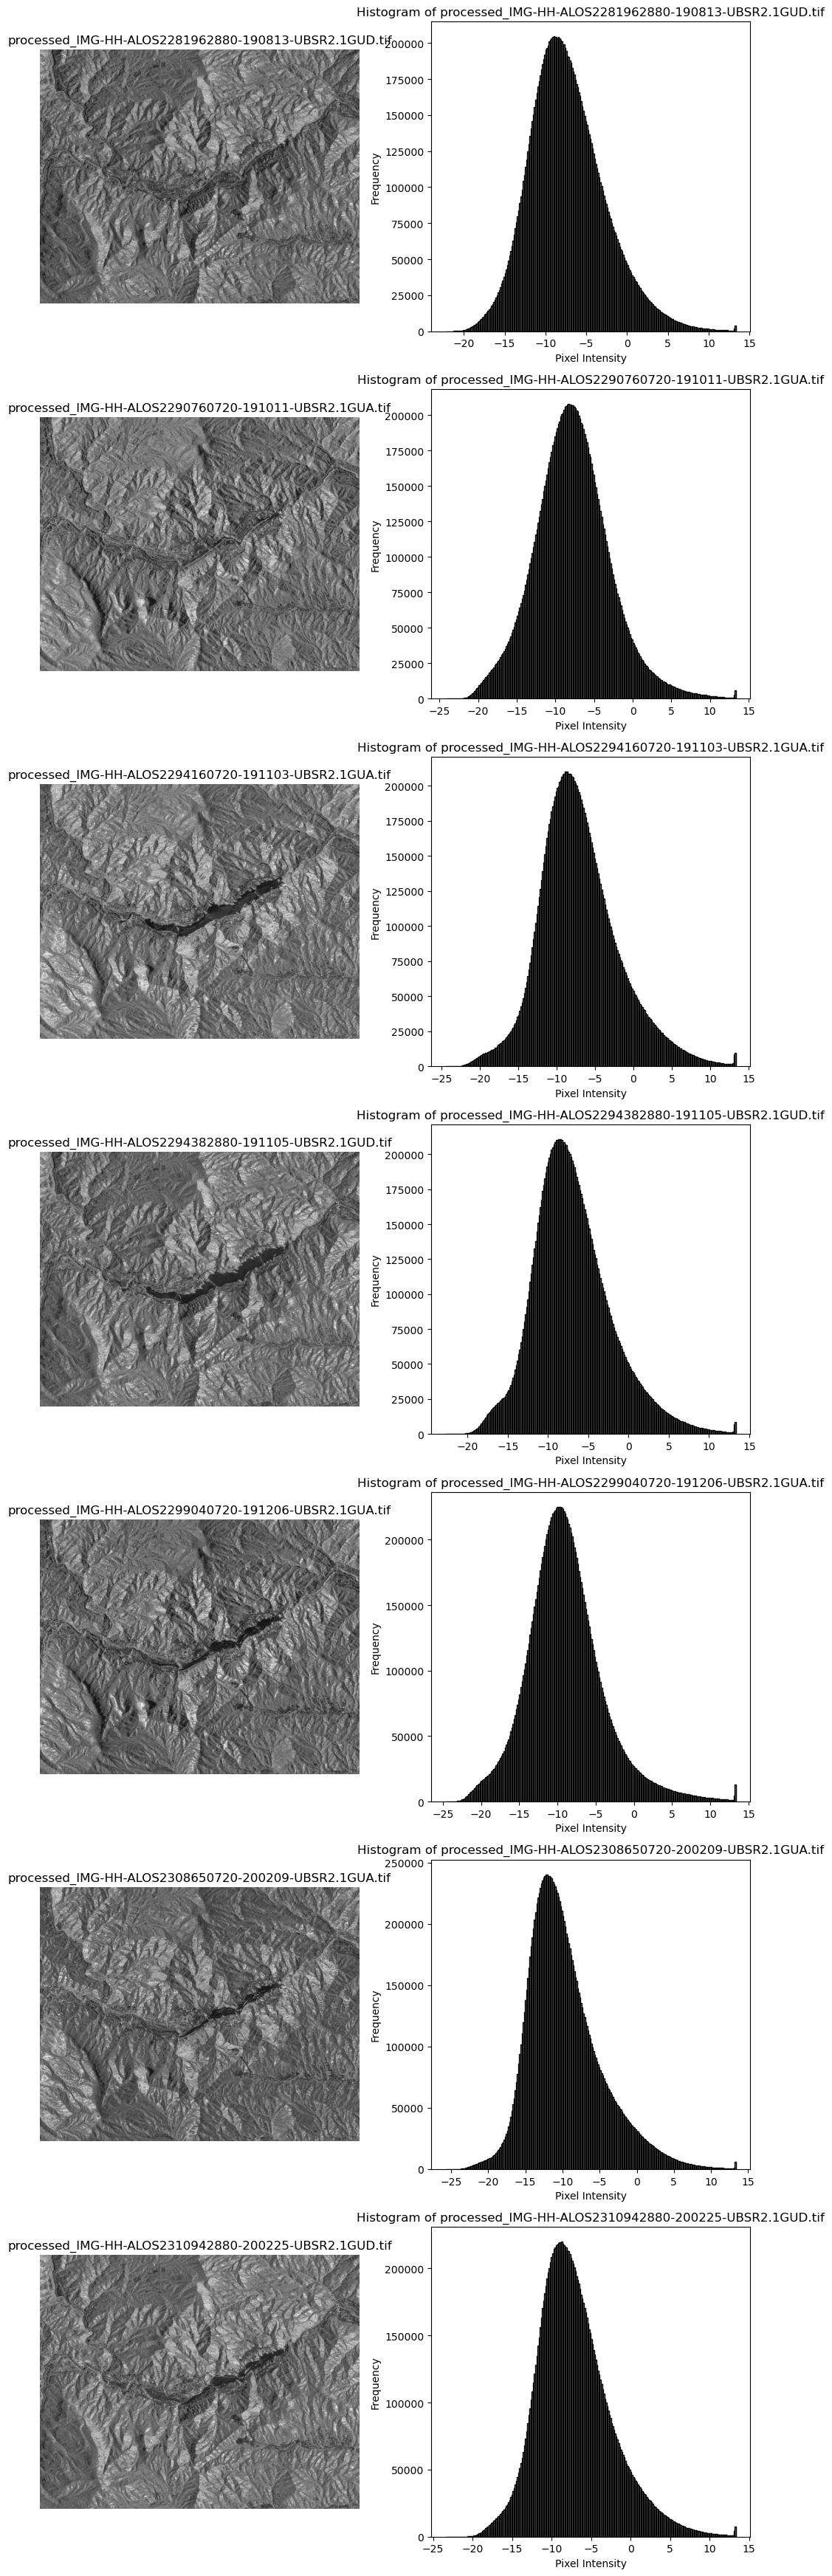

In [7]:
import os
import matplotlib.pyplot as plt
import rasterio
import numpy as np

# Folder containing the GeoTIFF images
folder_path = "/home/jovyan/shared/Arissara/genAI/processed_images"
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.tif')]

# Sort or filter images if needed
image_files = sorted(image_files)[:7]  # Take only the first 7 images if more are present

# Define titles (use filenames as titles)
figure_titles = [os.path.basename(f) for f in image_files]

# Number of rows and columns for the grid (each image has its histogram next to it)
n_images = len(image_files)
n_cols = 2  # One column for the image and one for the histogram
n_rows = n_images  # Each image gets its own row

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.reshape(n_rows, n_cols)

# Loop through images and display both the image and its histogram
for idx, image_path in enumerate(image_files):
    with rasterio.open(image_path) as src:
        image_data = src.read(1)  # Read the first band; adjust if multi-band image

    # Plot the image
    im = axes[idx, 0].imshow(image_data, cmap='gray')
    axes[idx, 0].set_title(figure_titles[idx])  # Use titles from the figure_titles list
    axes[idx, 0].axis("off")

    # Plot the histogram
    hist, bin_edges = np.histogram(image_data, bins=256, range=(image_data.min(), image_data.max()))
    axes[idx, 1].bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color='gray', edgecolor='black', align='edge')
    axes[idx, 1].set_title(f"Histogram of {figure_titles[idx]}")
    axes[idx, 1].set_xlabel("Pixel Intensity")
    axes[idx, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()